# Statistical analysis of diamonds dataset

With this statistical analysis I want to use this dataset of diamonds to explore correlations between price and other factors. If there is a correlation that can be found, I want to use it to make a regression and prediction model for the price of diamonds. 

In [104]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

# load and gives a quick view into what the dataset looks like
df = pd.read_csv("assets/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


I started by exploring the dataset to determine what values exist in the different columns.
Also note that I have checked if the data needed to be cleaned and found nothing wrong with it and no null values.

In [105]:
# prints the different types of values in all the non-numerical columns 
print(df["cut"].unique())
print(df["color"].unique())
print(df["clarity"].unique())

# gives information on the data in the numerical columns such as mean and min/max
df.describe()

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Using correlation test to see if there are any correlations between the columns primarily looking at price since that's what I want to explore. I'm using the absolute values so that correlation will range from 0-1 with closer to 1 being higher correlation. Since it's the absolute value it won't show if it's a positive or negative correlation so that would need to be analyzed further later on.

C:\Users\Rasmus\AppData\Local\Temp\ipykernel_6156\2140611584.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,0.295779,0.010647,0.025289,0.029341,0.094924
table,0.181618,0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


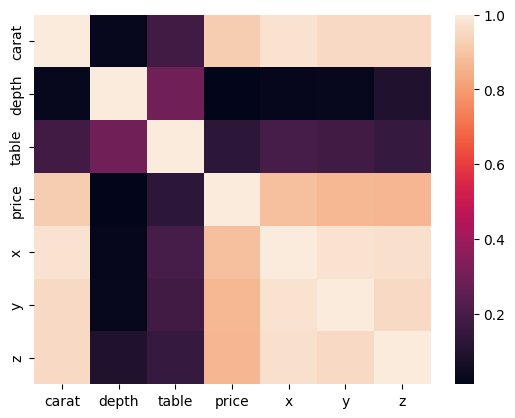

In [106]:
# makes a correlation dataframe between numerical value columns 
corr = df.corr()

# prints a heatmap of the correlation between columns. Using abs to turn negative correlation into positive.
sns.heatmap(abs(corr))
abs(corr)

There is a clear and high correlation between price and carat which will be the continued focus of this report. Another note from this information that I failed to think about before is the correlation between carat and x,y,z. Carat is a weight unit and x, y and z are all size measurements of different types, so of course the size of the diamonds is correlated to its weight. However, this correlation is not of interest for my analysis. 

## Regression

Continuing with this information I want to further explore the correlation between carat and price. By creating a regression model to visualize the correlation between them. The scatterpoints will show if there are any outliers and the prediction will show if the dataset fits a linear regression model.  

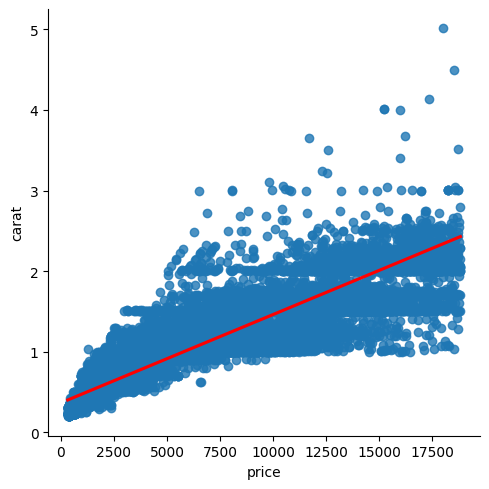

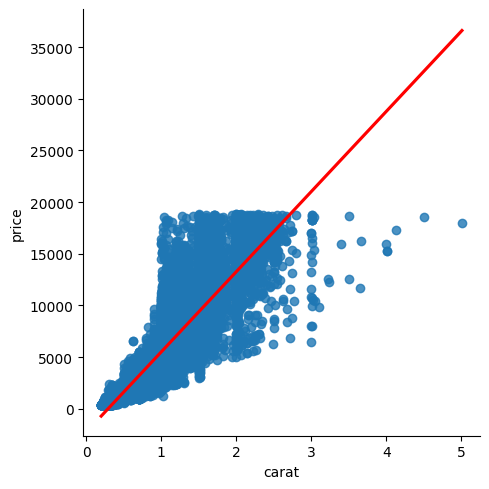

In [107]:
# makes two plots that show the regression model of price and carat
sns.lmplot(data=df, x="price", y="carat", line_kws={"color": "red"})
sns.lmplot(data=df, x="carat", y="price", line_kws={"color": "red"})

I decided to make two versions of the graph with swapped x and y axises to help with the clarity of the visualization.  
Notes from this is that it seems that a linear model works for this dataset. There could be a more optimal model that is exponential but as that is out of the scope of this class I will stick to the linear one.  
The visual also shows the maximum price of diamonds in the dataset are around 20000 and that most diamonds in the dataset are below 3 carat with very few being above 3 carat considering the sample size of the dataset.  
</br> 

**How to interpret these graphs.** </br> 
I decided that it was more visually clear to use the graphs where price is on the x-axis and carat on the y-axis, and will be doing so for most other graphs. 
</br>
Since carat is on the y-axis and price on the x-axis it means that lowest furthest right points are the most expensive and the highest and leftmost ones are the cheapest. Since its a weight per price value, diamonds higher on the graph will be of lower quality, this is important for understanding the next section. 

## Grouping

To further continue with finding a good correlation and prediction model for price I decided to repeat the last regression model but with the dataset grouped by the different non-numerical columns. This is to try and see if there is a subset that works better with the linear model and what factors could explain the outliers that are above 3 carat in weight. 

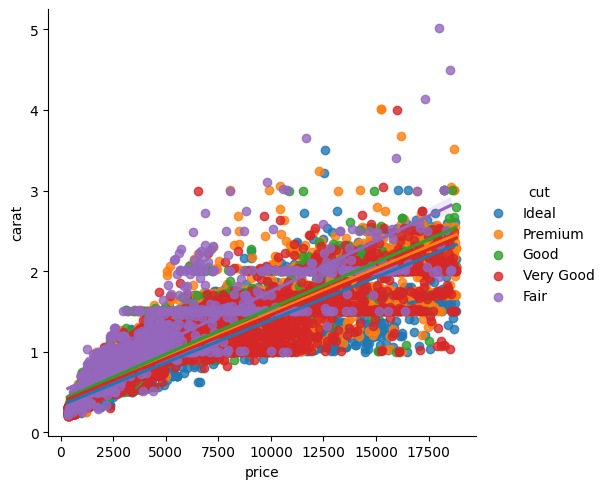

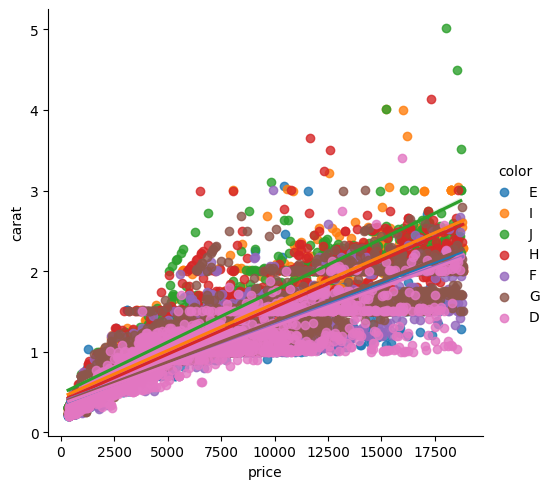

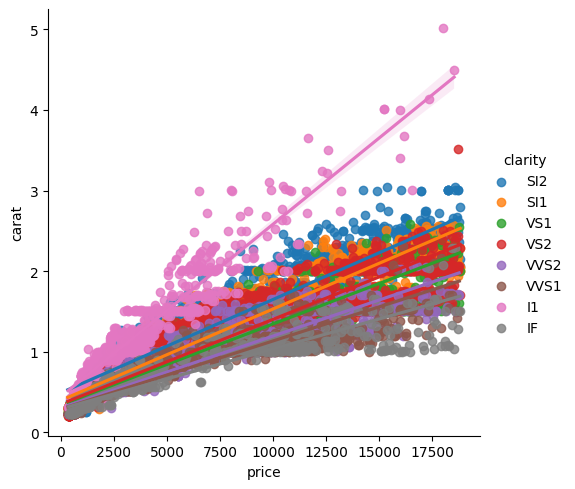

In [108]:
# plots regression model for price and carat factored by cut, color and clarity
sns.lmplot(data=df, x="price", y="carat", hue="cut")
sns.lmplot(data=df, x="price", y="carat", hue="color")
sns.lmplot(data=df, x="price", y="carat", hue="clarity")

From this we can note a couple of things. The grouping by cut is the closest to the original ungrouped graph and thus has the least correlation to price. The grouping by color seems to be better with a larger difference in price per color. However, the clearest grouping is clarity as it has low overlap between different clarities with increased price, and contain all but one of the diamonds above 3 carat. As explained above on how to read these graphs this would mean that I1 clarity is the worst/cheapest in this dataset as larger I1 diamonds are worth the same or less than other smaller diamonds. 

## Hypothesis test

Hypothesis I1 clarity diamonds have a greater average weight(carat) $\mu$ than the average for all diamonds, with the assumed average value 0.797940

$H_A: \mu > 0.797940$ <br>
$H_0: \mu \le 0.797940$

this is done with a confidence of $\alpha = 0.05$

In [109]:
# makes a dataframe with only diamonds of I1 clarity
df_clarity = df.query("clarity == 'I1'")
carat_clarity = df_clarity["carat"]
mu = df["carat"].mean()

results = scs.ttest_1samp(a=carat_clarity, popmean=mu, alternative="greater")
print(results)


TtestResult(statistic=20.914386528469134, pvalue=5.655204591105468e-77, df=740)


since $p=5.655204591105468e-77 < \alpha = 0.05$ we can with a 95% confidence level say that we should throw out the null hypothesis that I1 clarity diamonds would have less than or equal carat average than the total average of diamonds. As long as the assumed total average is true. 

## OLS sample prediction

Lastly I will conduct an ordinary least squares regression and prediction on a smaller sample from the dataset. This is to get a clearer graph for the regression model as well as prediction confidence interval 

First I will perform a correlation test for a random sample of 100 from the dataset that gives a correlation coefficient and also a p-value. <br> 
The p-value is based on a hypothesis test with the null hypothesis that the distributions are uncorrelated and normally distributed. <br>
The p-value represents the probability that an uncorrelated system would produce similar correlation to the one here. <br>
It has a confidence level of 95% or $\alpha = 0.05$ <br> 
This means that a r-value close to 1 or -1 indicates high correlation and a low p-value shows that it is unlikely that the r-value would be a non or false correlation. 

In [110]:
# gets a sample from the data and calculates the correlation coefficient between price and carat.
df_test = df.sample(100)
scs.pearsonr(df_test["price"], df_test["carat"])

PearsonRResult(statistic=0.9218183227527948, pvalue=4.0165901516393457e-42)

In [111]:
model = ols("price ~ carat", data=df_test).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     554.2
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           4.02e-42
Time:                        18:21:13   Log-Likelihood:                -865.83
No. Observations:                 100   AIC:                             1736.
Df Residuals:                      98   BIC:                             1741.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2599.2757    310.543     -8.370      0.0

The hypothesis test returns a r-value that is close to 1 and a p-value that is smaller then 0.05 indicating a nonfalse correlation. <br> 
The OLS model shows information on the model such as significance, coefficients, confidence interval and most importantly the $R^{2}$ value which indicates how well the independent variable explains the dependent variable.  

### Prediction graph

Next I'm creating a plot of the sample to show the prediction model with its confidence interval for a confidence level of 95%. <br> 
Note that here I have gone back to using price on the y-axis and carat on the x-axis since the sample contains less datapointss which improves the visual clarity. In this graph lower points are lower value diamonds as opposed to the other graphs. 

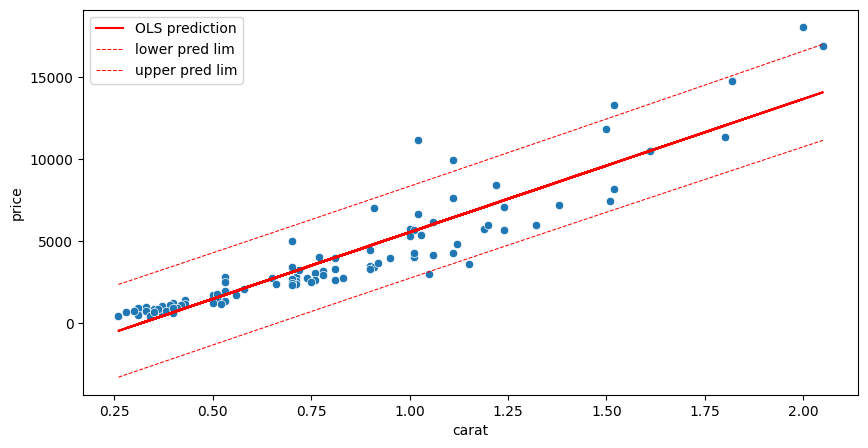

In [112]:
# creates a prediction model for carat with the confidence level 95% 
predictions = model.get_prediction(df_test["carat"])
frame = predictions.summary_frame(alpha=0.05)
ypred = frame["mean"]

# makes the sorted arrays to use for the confidence interval lines
order = np.argsort(df_test["carat"])
xs = np.array(df_test["carat"])[order]
lower = np.array(frame["obs_ci_lower"])[order]
upper = np.array(frame["obs_ci_upper"])[order]

fig, ax = plt.subplots(figsize=(10,5))

# generates the scatterplot of all sample points aswell as the predictionmodel with its confidence interval
sns.scatterplot(data=df_test, x="carat", y="price")
ax.plot(df_test["carat"], ypred, "r", label="OLS prediction")
ax.plot(xs, lower, "--r", label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, "--r", label="upper pred lim", linewidth=0.75)

ax.legend(loc="best")
plt.show()

## conclusion

With this we can see that the prediction model seems fairly accurate for the sample as most points fall within the prediction's confidence interval. So we can conclude that this would be a functioning prediction model for the price or carat of diamonds. It should be noted that the sample did not contain any diamonds with over 3 carat which could affect the results in other samples taken from the dataset. This is due to the limited numbers of larger the 3 carat diamonds in the dataset.